### Import your librares

In [1]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load your dataset

In [2]:
#Read dataset
df = pd.read_csv('/Users/norah/Desktop/labs/Outliers-Lab1/seattle_weather.csv')

### Handle missing data in PRCP and RAIN columns

In [3]:
df_nullColumns = df.columns[df.isnull().any()]
sumNullColumns = df[df_nullColumns].isnull().sum()
print("The columns that have null values are:\n", sumNullColumns)

The columns that have null values are:
 PRCP    3
RAIN    3
dtype: int64


In [4]:
df.RAIN.var()

0.24462904154362605

In [5]:
# testing the variation
#mode
df2 = pd.read_csv('/Users/norah/Desktop/labs/Outliers-Lab1/seattle_weather.csv')
PRCP_mode = df2.PRCP.mode()[0]
df2['RAIN'] = df2['RAIN'].fillna(PRCP_mode)
df2.RAIN.var()

0.24462168866671707

In [6]:
# mean
df2 = pd.read_csv('/Users/norah/Desktop/labs/Outliers-Lab1/seattle_weather.csv')
PRCP_mean = df2.PRCP.mean()
df2['RAIN'] = df2['RAIN'].fillna(PRCP_mean)
df2.RAIN.var()

0.24461237209813327

In [7]:
# median
df2 = pd.read_csv('/Users/norah/Desktop/labs/Outliers-Lab1/seattle_weather.csv')
PRCP_median = df2.PRCP.median()
df2['RAIN'] = df2['RAIN'].fillna(PRCP_median)
df2.RAIN.var()

0.24462168866671707

In [8]:
# forward
df2 = pd.read_csv('/Users/norah/Desktop/labs/Outliers-Lab1/seattle_weather.csv')
df2['RAIN'] = df2['RAIN'].fillna(method="ffill")
df2.RAIN.var()

0.24462168866671707

In [9]:
# backward
df2 = pd.read_csv('/Users/norah/Desktop/labs/Outliers-Lab1/seattle_weather.csv')
df2['RAIN'] = df2['RAIN'].fillna(method="bfill")
df2.RAIN.var()

0.24462168866671707

In [10]:
#I choose forward to fill the null data since it makes more sense and it's closer to the variance
df = pd.read_csv('/Users/norah/Desktop/labs/Outliers-Lab1/seattle_weather.csv')
df['RAIN'] = df['RAIN'].fillna(method="ffill")
df.RAIN.var()

0.24462168866671707

In [11]:
df.PRCP.var()

0.05713603840671194

In [12]:
PRCP_mean = df2['PRCP'].mean()
null_PRCP = df[df['PRCP'].isnull()]['RAIN'].unique()

# Fill null PRCP values with mean PRCP values by RAIN

for index, row in df.iterrows(): 
    if row['RAIN'] is True: #if it's raining,  fill the the null with the PRCP mean
        df.loc[(df['RAIN'] == True) & (df['PRCP'].isnull()), 'PRCP'] = PRCP_mean
    elif row['RAIN'] is False: #if it's not raining, set PRCP to zero
        df.loc[(df['RAIN'] == False) & (df['PRCP'].isnull()), 'PRCP'] = 0

In [13]:
df.PRCP.var()

0.05713065433662097

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


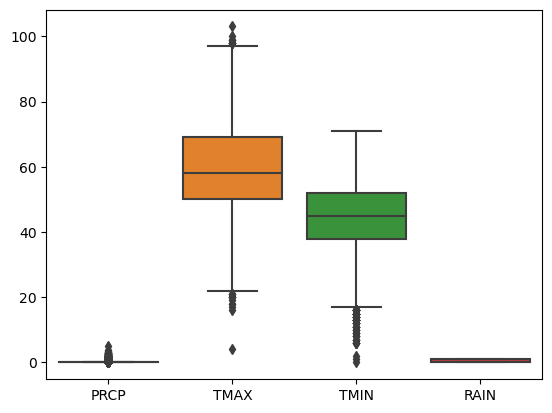

In [14]:
# Box Plot.
sns.boxplot(data=df);

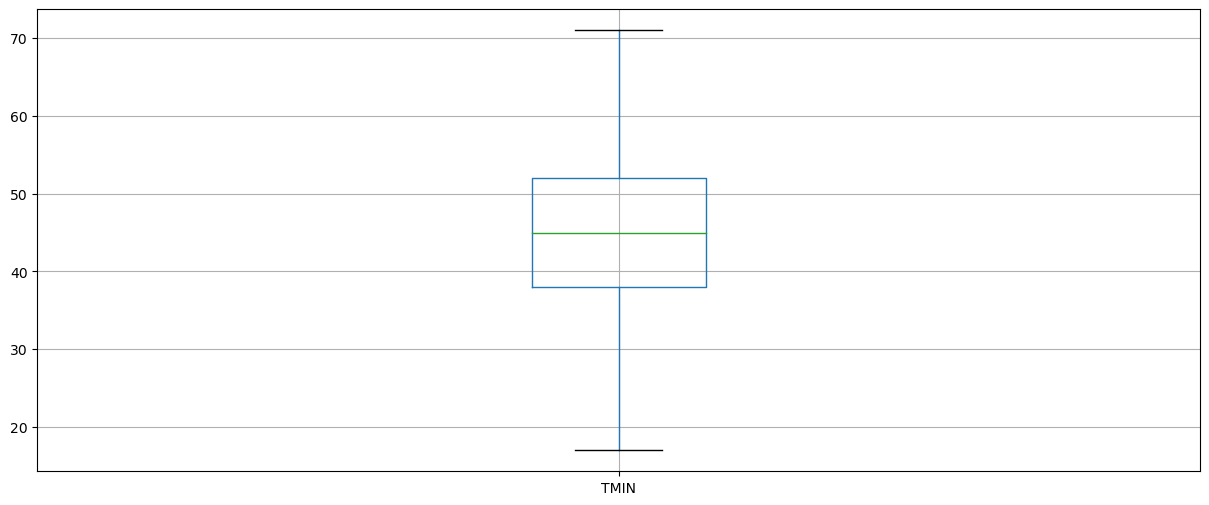

In [15]:

Q1 = df['TMIN'].quantile(0.25)
Q3 = df['TMIN'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5*IQR
UpperBound= Q3 + 1.5*IQR

df = df.drop(df[(df['TMIN'] < LowerBound) | (df['TMIN'] > UpperBound)].index)
df.boxplot(column=['TMIN'], figsize=(15, 6))
plt.show();



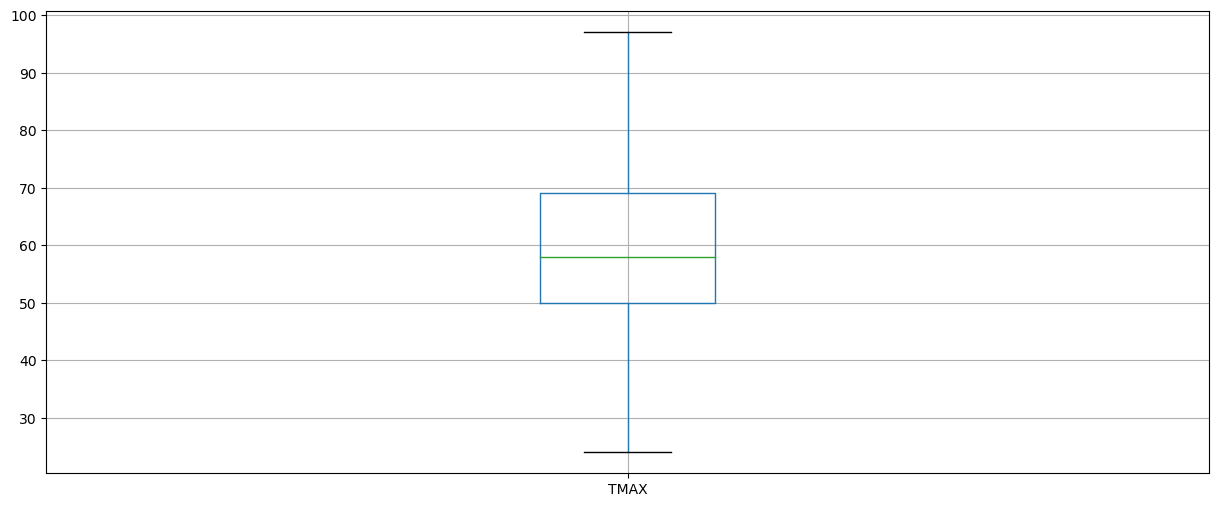

In [16]:


Q1 = df['TMAX'].quantile(0.25)
Q3 = df['TMAX'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5*IQR
UpperBound = Q3 + 1.5*IQR


df = df.drop(df[(df['TMAX'] < LowerBound) | (df['TMAX'] > UpperBound)].index)
df.boxplot(column=['TMAX'], figsize=(15, 6))
plt.show();


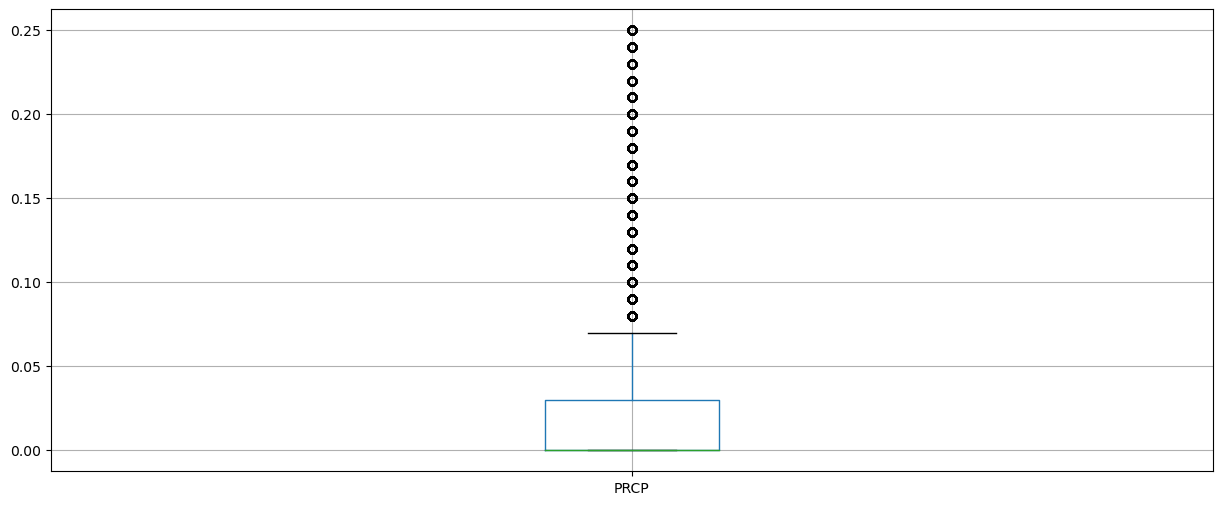

In [17]:
Q1 = df['PRCP'].quantile(0.25)
Q3 = df['PRCP'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5*IQR
UpperBound = Q3 + 1.5*IQR


df = df.drop(df[(df['PRCP'] < LowerBound) | (df['PRCP'] > UpperBound)].index)
df.boxplot(column=['PRCP'], figsize=(15, 6))
plt.show();


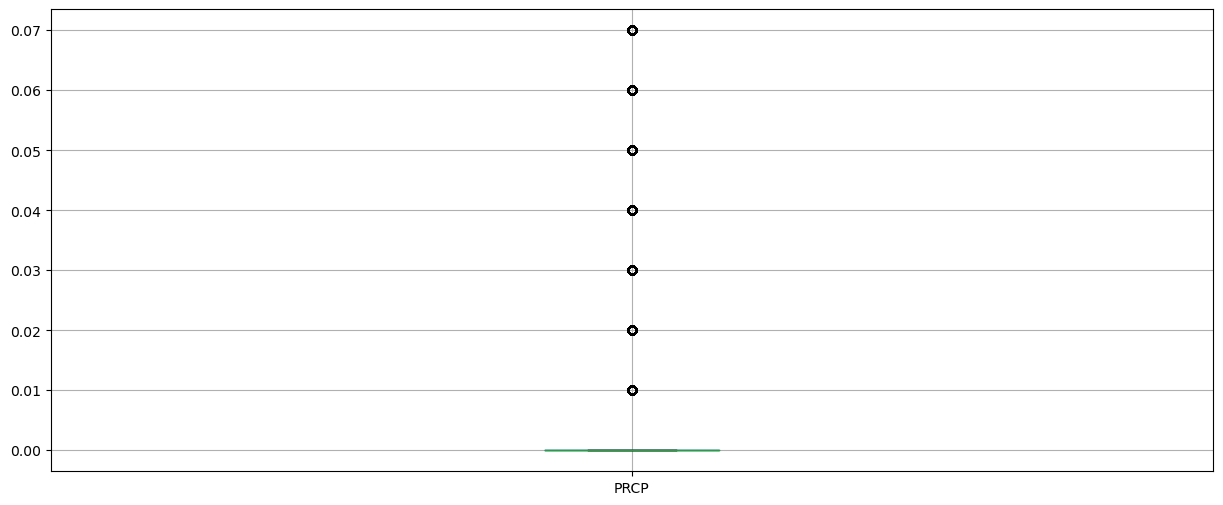

In [18]:
Q1 = df['PRCP'].quantile(0.25)
Q3 = df['PRCP'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5*IQR
UpperBound = Q3 + 1.5*IQR


df = df.drop(df[(df['PRCP'] < LowerBound) | (df['PRCP'] > UpperBound)].index)
df.boxplot(column=['PRCP'], figsize=(15, 6))
plt.show();


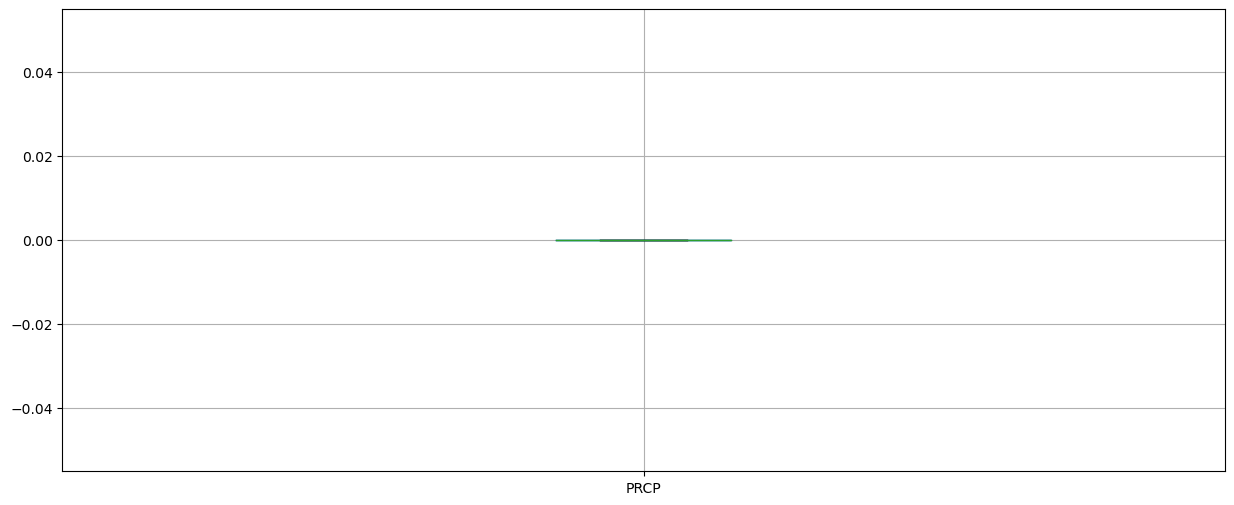

In [19]:
Q1 = df['PRCP'].quantile(0.25)
Q3 = df['PRCP'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5*IQR
UpperBound = Q3 + 1.5*IQR


df = df.drop(df[(df['PRCP'] < LowerBound) | (df['PRCP'] > UpperBound)].index)
df.boxplot(column=['PRCP'], figsize=(15, 6))
plt.show();
